In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Like SVMs, Decision Trees are versatile ML algorithms that can perform both classification and regression tasks, and even multioutput tasks.

To understand Decision Trees, let's build one and take a look at how it makes predictions.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

You cna visualize the trained Decision Tree by first using export_graphviz() method to output a graph definition file called iris_tree.dot

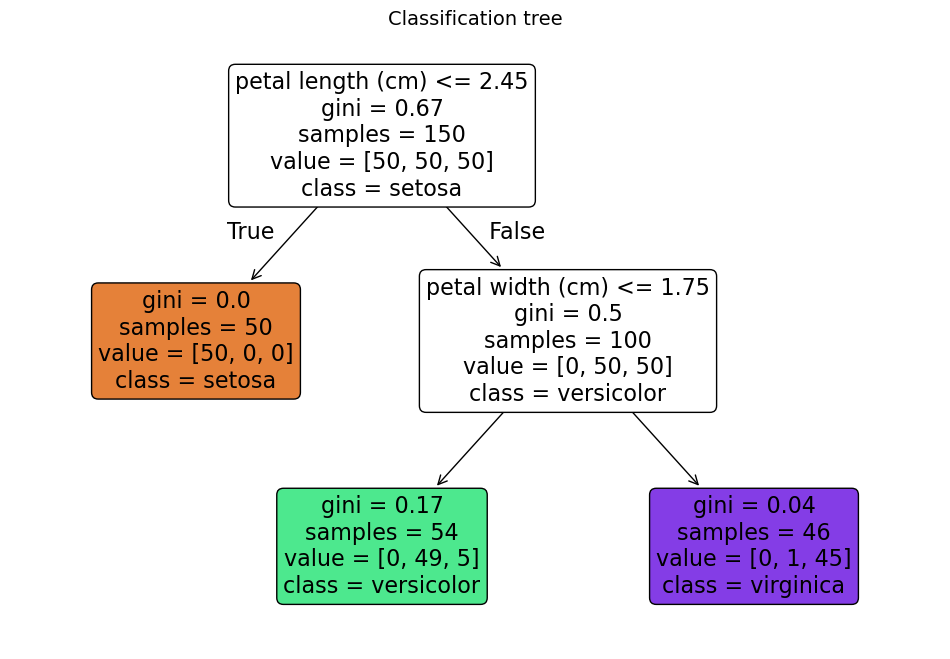

<Figure size 640x480 with 0 Axes>

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plot_tree(tree_clf,
          feature_names=['petal length (cm)', 'petal width (cm)'],
          filled=True,
          rounded=True,
          fontsize=16,
          class_names=iris.target_names,
          proportion=False,  # Display proportions instead of raw counts
          impurity=True,   # Don't show impurity (MSE for regression)
          precision=2)      # Number of decimal places
plt.title("Classification tree")
plt.show()

plt.savefig(IMAGES_PATH / 'classification_tree.png',  # Works with Path objects
           dpi=300, 
           bbox_inches='tight')

Making predictions

Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node is whether the flowe petal length is smaller than 2.45 cm. If it is, then you move down to the root left chilf node (depth 1, left). In this case it is a leaf node (it does not have any child nodes), so it does not asl any questions: simply look at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris Setosa.

No suppose you find another flower, and this time the petal length is greater than 2.45 cm. You must moce down to the root's right child node (depth 1), which is not a leaf node, so the node asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely and Iris Versicolor (depth 2, left). If not, it is likely an Iris Virginica.

One of many qualities of decision trees is that they require very little data preparation. In fact, they don't require feature scalling or centering at all.

A node's samples attribute counts how many training instances it applies to. For example, 100 training instances gave a petal length greater than 2.45 cm (depth 1, right)n and out of those 100, 54 have a petal width smaller than 1.75 cm (septh 2, left). A node's value attribute tells you how many training instances of each class this node aoolies to: for example, the bottom-right node applies to 0 iris setosa, 1 versicolor and 45 virginica. Finally, a node's gini attribute measures its impurity: a node is 'pure' (gini=0) if all training instances it applies to beling to the same class. For example, since depth-1 left node not only to Iris Setosa training instances, it is pure and its Gini score is 0.

The depth-2 left node has a gini score equal to 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 =aprox 0.168

Scikit-learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children. However, other algoritms such us ID3 can produce Decision Trees with nodes that have more than two children.

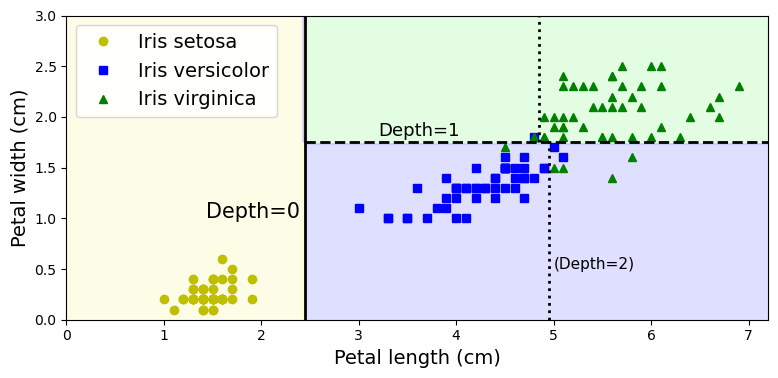

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha = 0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ('yo', 'bs', 'g^'))):
    plt.plot(X_iris[:, 0][y_iris == idx], # All rows from column 0 for class idx
             X_iris[:, 1][y_iris == idx], # All rows from column 1 for class idx
             style,                       # Marker style (e.g., "yo" = yellow circle)
             label=f'Iris {name}')        # Legend label (e.g., "Iris setosa")
    
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]  # Extracts the threshold values used for splits in the decision tree.
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.plot([th0, th0], [0, 3], 'k-', linewidth=2)        # Depth=0 split (A vertical line at x=th0 spanning the full y-axis (0 to 3))
plt.plot([th0, 7.2], [th1, th1], 'k--', linewidth=2)   # Depth=1 split (A horizontal dashed line at y=th1 from x=th0 to x=7.2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)    # Depth=2 left split (A dotted vertical line at x=th2a from y=0 to y=th1)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)    # Depth=2 right split (A dotted vertical line at x=th2b from y=th1 to y=3)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

This figure shows this Decision Tree boundaries. The think vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris Setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to , the Decision Tree stops right there. If you set max_depth to , then the two depth- nodes would each add another decision voundary (represented by the dotted lines).

Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris Setosa (0/54), 90.7% for Iris Versicolor (49/57) and 9.3% for Iris Virginica (5/54). And if you ask it to predict the class, it should output Iris Versicolor (class 1) because it has the highest probability.

In [7]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees. The algoritm works by first splitting the training set into two subsets using a single feature k and a threshold tk (e.g. 'petal length >= 2.45 cm'). How does it choose k and tk? It searches for the pair (k, tk)that produces the purest subsets (weighted by size).

Once the CART algorithm has succesfully split the training set in two, it splits the subsets using the same logic. It stops recursing once it reaches the maximum depth, or it cannot find a split that will reduce impurity

As you can see CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It does not check wether or not the split will lead to the lowest possible impurity several levels down. Agreedy algorithm otften produces a solution that is rational but not guaranteed to be optimal.

Computational Complexity

Making predictions requires traversing the Decision Tree from the root to a leaf . Decision Trees generally are approximately balanced, so traversing the tree requires going through roughly O(log2(m)) nodes. Since each node only requires checking the value of one feature, the overall prediction complexity is O(log2(m)), independent of the number of features. So predictions are very fast, even when dealing with very large training sets.

Gini Impurity or Entropy?

Most of the times it does not make a big difference: they lead to similar trees. Giny impurity is slightly faster to compute, so it is a good default. However, when they differ, Giny impurity tends to isolate the most frequest class in its own branch of the tree, while entropy tends to prodduce slightly more balanced trees.

Regularization Hyperparameters

Decision Trees make very few assumptions abouth the training data. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, indeed most likely overfitting it. Such a model is often called a non-parametrical model, not because it does not have any parameters but because the number of parameters is not determinated prior to training, so the model structure is free to stick closely to the data. In contras, a parametric model, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree's freedom during training. As you know by now, this is called regularization. Reduzing max_depth will regularize the model and thus, reduce the risk of overfitting.

The DecisionTreeClassifier class has other few parameters that similarly restrict the shape of the Decision Tree: min_sample_split (the minimum number of samples a node must have before it can split), min_samples_leaf (the minimum number of samples a leaf node must have), min_weight_fraction_leave (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (the maximum number of leaf nodes) and max_features (the maximum number of features that are evaluated for spplitting at each node).
Increasing min_* hyperparameters or reducing max_* hyperparameters wukk regularize the model.


Next figure shows two decision trees trained on the moons dataset. On the ledft the Decision Tree is trained with the default hyperparameters, and on the right it is trained with min_samples_leaf = 5.

In [9]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

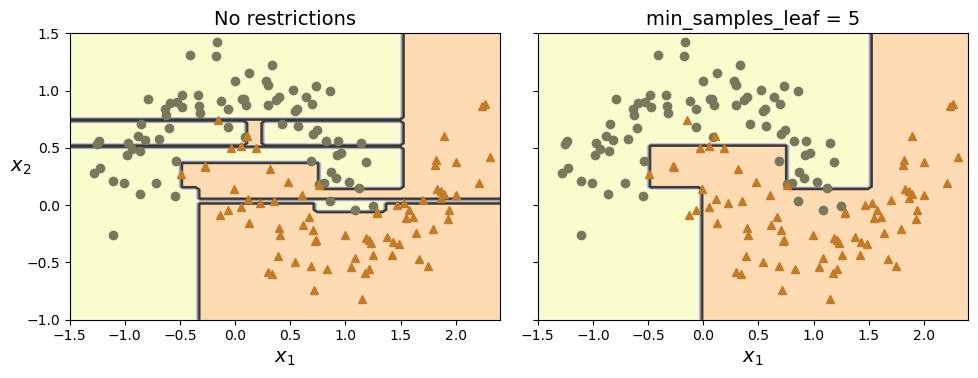

In [10]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

In [11]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [12]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

Regression

Decision Trees are also capable of performing regression tasks. LEt's build a Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

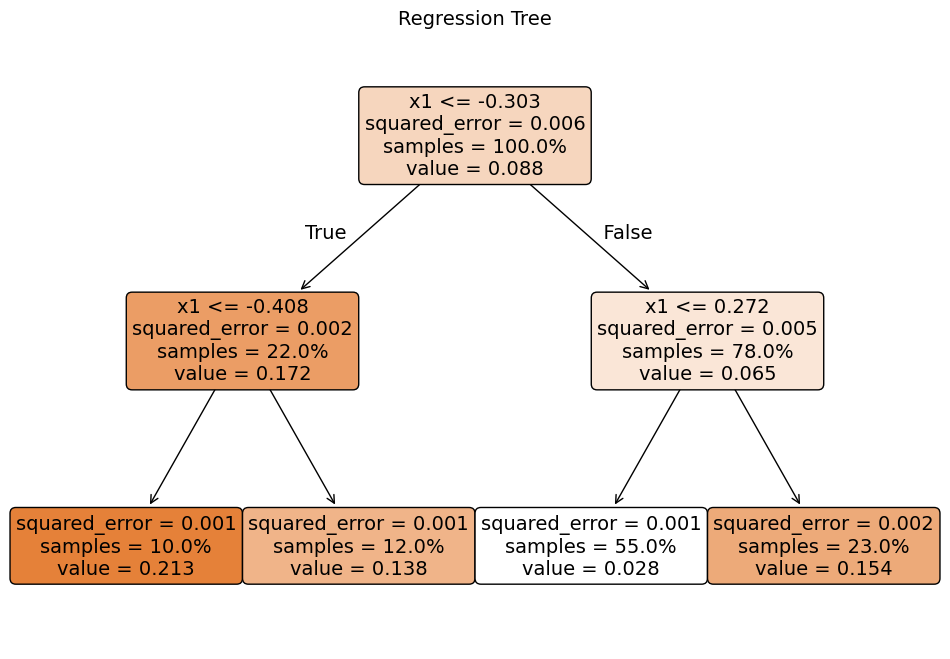

<Figure size 640x480 with 0 Axes>

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_reg,
          feature_names=['x1'],
          filled=True,
          rounded=True,
          proportion=True,  # Display proportions instead of raw counts
          impurity=True,   # Don't show impurity (MSE for regression)
          precision=3)      # Number of decimal places
plt.title("Regression Tree")
plt.show()

plt.savefig(IMAGES_PATH / 'regression_tree.png',  # Works with Path objects
           dpi=300, 
           bbox_inches='tight')

This tree looks very similar to the classification tree from earlier. The main difference is that instead of predicting a class in each node, it predicts a value. For example, suppose that you want to make a prediction for a new instance with x1 = 0.6, you traverse the tree and you end up on the leaf node that predicts the value 0.154. This prediction is the average target value of the 200 training instances associated with this leaf node and it results in a mean squared error equal to 0.002 over these 200 instances.

This model predictions are presented on the left in the next figure. If you set max_depth=3, you get the predictions represented on the right. Notice how the predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

In [42]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [43]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [44]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

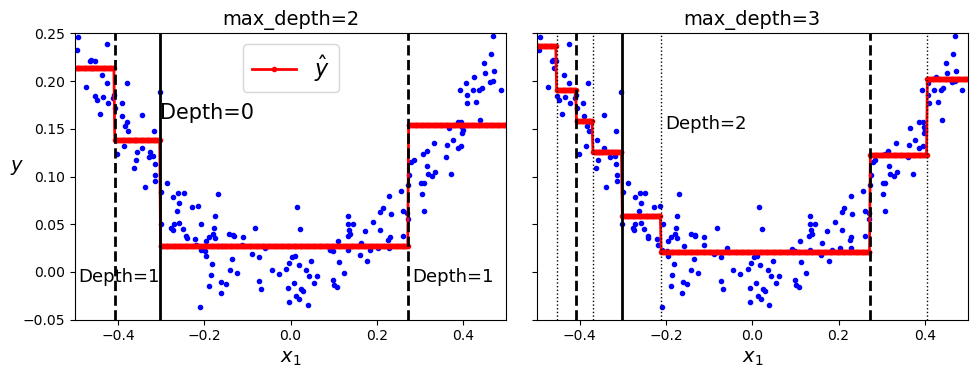

In [45]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

The CART algorithm works mostly in the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it nows tries to split the training set in a way that minimizes MSE.

Just for the classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks. Without any regularization, you get the predictions on the left (next figure). These predictions are obviously overfitting the training set very badly. Just setting min_samples_leaf = 10 results in a much more reasoanble model.

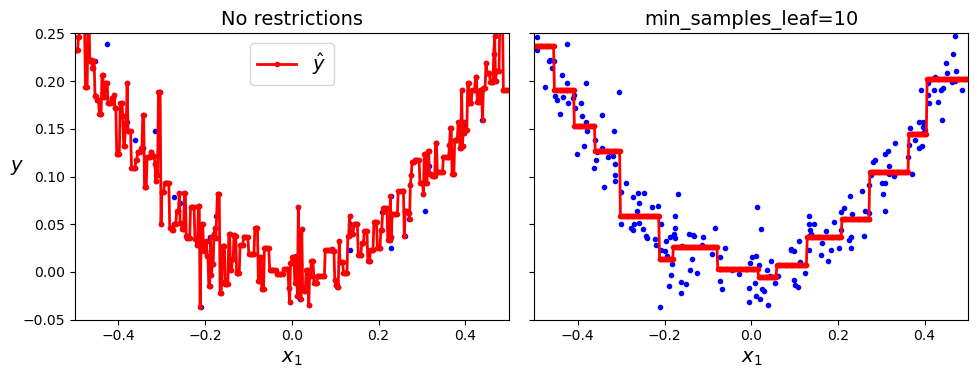

In [46]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

Sensitivity to Axis Orientation (Instability)

Decision Tress have few limitations. First of all DT love orthogonal decision boundaries (split prependicular to an axis), whcih make them sensitive to training set rotation. NExt figure shows how when rotating 45 degrees the dataset, the decision boundary looks unnecesarily convoluted. Athough both decision trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

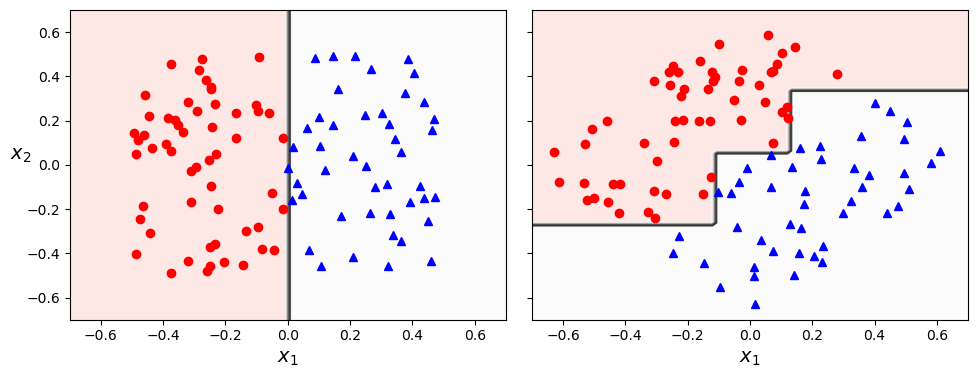

In [47]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

More generally, the main issue with Decision Trees is that they are very sensitive to small variations  in the training data. For example, if you remove the widest Iris Versicolor from the iris training set and train a new Decision Tree, you may get the model represented on the next figure. As you can see, it looks very different form the previous Decision Tree. Actually since the training algorithm used by Scikit-Learn is stochastic (randomly selects the set of features to evluate at each model), you may get very different models even with the same training data (unsless you set the random_state hyperparameter).

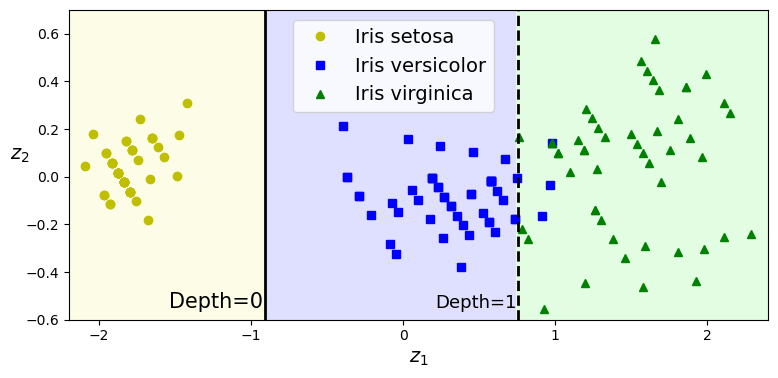

In [48]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

Random Forests can limit this instability by averaging predictions over many trees.

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:

In [49]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

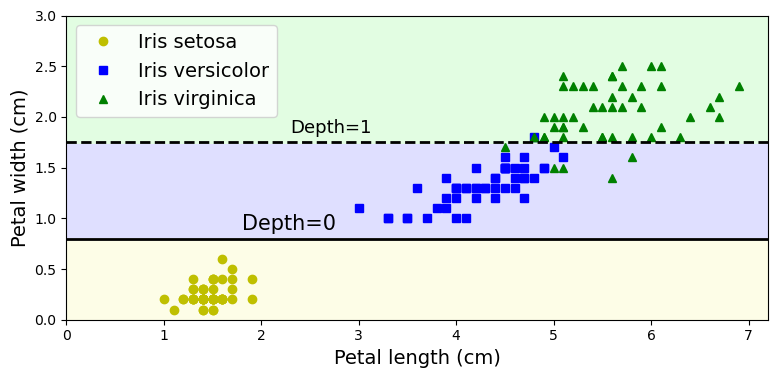

In [50]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

Extra Material – Accessing the tree structure

A trained DecisionTreeClassifier has a tree_ attribute that stores the tree's structure:

In [51]:
tree = tree_clf.tree_
tree

You can get the total number of nodes in the tree:

In [52]:
tree.node_count

5

And other self_explanatory attributes are available:

In [53]:
tree.max_depth

2

In [54]:
tree.max_n_classes

3

In [55]:
tree.n_features

2

In [56]:
tree.n_outputs

1

In [57]:
tree.n_leaves

3

All the information about the nodes is stored in NumPy arrays. For example, the impurity of each node:

In [58]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

The root node is at index 0. The left and right children nodes of node i are tree.children_left[i] and tree.children_right[i]. For example, the children of the root node are:

In [59]:
tree.children_left[0], tree.children_right[0]

(1, 2)

When the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):

In [60]:
tree.children_left[3], tree.children_right[3]

(-1, -1)

So you can get the leaf node ids like this:

In [61]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

Non-leaf nodes are called split nodes. The feature they split is available via the feature array. Values for leaf nodes should be ignored:

In [62]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [63]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

And the number of instances per class that reached each node is available too:

In [64]:
tree.value

array([[[0.33333333, 0.33333333, 0.33333333]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 0.5       , 0.5       ]],

       [[0.        , 0.90740741, 0.09259259]],

       [[0.        , 0.02173913, 0.97826087]]])

In [65]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [66]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

False

Here's how you can compute the depth of each node:

In [67]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

Here's how to get the thresholds of all split nodes at depth 1:

In [68]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

In [69]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])

EXERCISE 7 - Train and fine-tune a Decision Tree ft the moons dataset

Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

Adding random_state=42 to make this notebook's output constant and split it into a training set and a test set using train_test_split().

In [73]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

In [74]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [75]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [76]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

EXERCISE 6 - Grow a forest.

Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size = len(X_train) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index] # Gets features for the 100-sample subset
    y_mini_train = y_train[mini_train_index] # Gets corresponding labels
    mini_sets.append((X_mini_train, y_mini_train))

Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [ ]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]  #Clone 1000 copies of best_estimator_

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):  # Train each tree on a 100-sample subset
    tree.fit(X_mini_train, y_mini_train)  

    y_pred = tree.predict(X_test)  # Evaluate each tree on X_test
    accuracy_scores.append(accuracy_score(y_test, y_pred)) # Calculate mean accuracy

np.mean(accuracy_scores)

0.8056605

Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [80]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [81]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [82]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873